## Linear Model

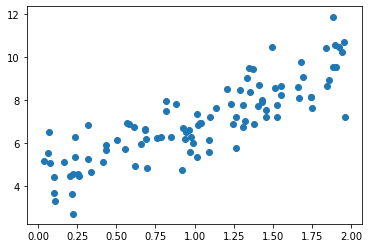

In [198]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)

Now let’s compute θˆ using the Normal Equation(closed from of beta's). We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [199]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.28392384]), array([[2.66623711]]))

In [200]:
lin_reg.predict(X_new)

array([[4.28392384],
       [9.61639806]])

### Gradient Descent

As you can see **(figure 4.7 on te classification capture)**, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

WA

**May Important** 

When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

### Batch Gradient Descent

In [201]:
eta = 0.1
# learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [202]:
theta

array([[ 7.2816772 ],
       [-0.27304012]])

### Stochastic Gradient Descent

### Mini-batch Gradient Descent

### Polynomial Regression

In [203]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

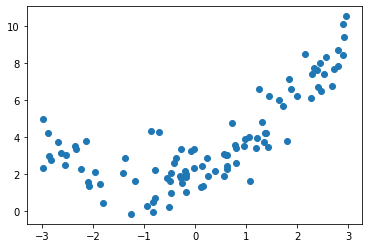

In [204]:
import matplotlib.pyplot as plt 
plt.scatter(X,y)

In [205]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [206]:
poly_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [207]:
X[0]

array([-0.36596184])

In [208]:
X_poly[:5]

array([[-0.36596184,  0.13392807],
       [ 2.45928859,  6.04810037],
       [-2.85464546,  8.14900068],
       [ 0.56010148,  0.31371367],
       [ 2.40386506,  5.77856724]])

In [209]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.14762321]), array([[0.98032732, 0.49769481]]))

In [210]:
lin_reg.predict()

TypeError: predict() missing 1 required positional argument: 'X'

**WARNING**

PolynomialFeatures(degree=d) transforms an array containing n features into an array containing (n + d)! / d!n! features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

#### Learning Curves

This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Let’s look at the learning curves of the plain Linear Regression model (a straight line; see Figure 4-15):

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This model that’s underfitting deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

**TIP**

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data (Figure 4-16):

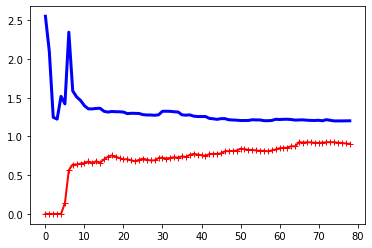

In [211]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:

 * The error on the training data is much lower than with the Linear Regression model.

 * There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

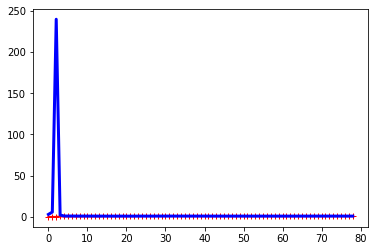

In [212]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Models

### Ridge Regression

In [213]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.12187916]])

In [214]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.10926066])

### Lasso Regression

In [215]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.08133292])

Note that you could instead use **SGDRegressor(penalty="l1")**

### Elastic Net

In [216]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.08129825])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure 4-20 shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a **“beautiful free lunch"**

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

## Logistic Regression

As we discussed in Chapter 1, some regression algorithms can be used for classification (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

Estimating Probabilities
So how does Logistic Regression work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, **it outputs the logistic of this result (see Equation 4-13).**

pˆ=hθ(x)=σ(θ⊺x)

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. It is defined as shown in Equation 4-14 and Figure 4-21.

In [222]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [223]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [226]:
X[:7]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3]])

In [227]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [228]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

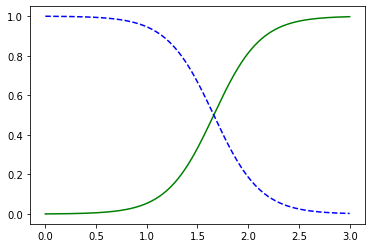

In [254]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty

In [240]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)# 0'dan 3 e giden 1000 sayı
#reshape(-1,1)= reshape(1000,1) ile aynı işi yapıyor.
X_new[:5]

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201]])

In [275]:
y_proba[:4]

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       [9.99220183e-01, 7.79816732e-04]])

In [296]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])